In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [5]:
import pandas as pd

# Load raw dataset
df = pd.read_csv('D:/Desktop1/Desktop/CKD-Prediction-Project/data/kidney_disease.csv')

In [6]:
# Keep 'id' column
if 'id' not in df.columns:
    print("⚠️ 'id' column not found in the dataset.")
else:
    df['id'] = pd.to_numeric(df['id'], errors='coerce')  # Make it's numeric

In [8]:
import numpy as np
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Convert numerical columns
numeric_cols = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot',
                'hemo', 'pcv', 'wc', 'rc']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [9]:
# Encode target column
df['classification'] = df['classification'].replace({'ckd': 1, 'notckd': 0, 'ckd\t': 1})

# Drop rows where target is missing
df.dropna(subset=['classification'], inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_5848\1538476007.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['classification'] = df['classification'].replace({'ckd': 1, 'notckd': 0, 'ckd\t': 1})


In [11]:
from sklearn.preprocessing import LabelEncoder

# Fill remaining missing values column-wise using mode
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Label encode all object columns (excluding classification which is already numeric)
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    if col != 'classification':
        df[col] = le.fit_transform(df[col])

In [12]:
# Save cleaned data
df.to_csv('../data/clean_ckd.csv', index=False)

In [15]:
df.isna().any()

id                False
age               False
bp                False
sg                False
al                False
su                False
rbc               False
pc                False
pcc               False
ba                False
bgr               False
bu                False
sc                False
sod               False
pot               False
hemo              False
pcv               False
wc                False
rc                False
htn               False
dm                False
cad               False
appet             False
pe                False
ane               False
classification    False
dtype: bool

In [16]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,44.0,7800.0,5.2,1,4,1,0,0,0,1
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,38.0,6000.0,5.2,0,3,1,0,0,0,1
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,31.0,7500.0,5.2,0,4,1,1,0,1,1
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32.0,6700.0,3.9,1,3,1,1,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,35.0,7300.0,4.6,0,3,1,0,0,0,1


EDA (Exploratory Data Analysis)

In [11]:
df.describe(include='all')  

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,51.675000,76.575000,1.017712,0.90000,0.395000,0.882500,0.810000,0.105000,0.055000,...,39.260000,8775.500000,4.868750,0.367500,3.300000,1.080000,0.205000,0.190000,0.150000,0.625000
std,115.614301,17.022008,13.489785,0.005434,1.31313,1.040038,0.322418,0.392792,0.306937,0.228266,...,8.191162,2597.309144,0.871606,0.482728,0.579517,0.289499,0.404207,0.392792,0.357519,0.484729
min,0.000000,2.000000,50.000000,1.005000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.750000,42.000000,70.000000,1.015000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,34.000000,6975.000000,4.500000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,199.500000,55.000000,80.000000,1.020000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,41.000000,9450.000000,5.200000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,299.250000,64.000000,80.000000,1.020000,2.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,44.000000,9800.000000,5.200000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,399.000000,90.000000,180.000000,1.025000,5.00000,5.000000,1.000000,1.000000,1.000000,1.000000,...,54.000000,26400.000000,8.000000,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000


Univariate Analysis

Age Distribution

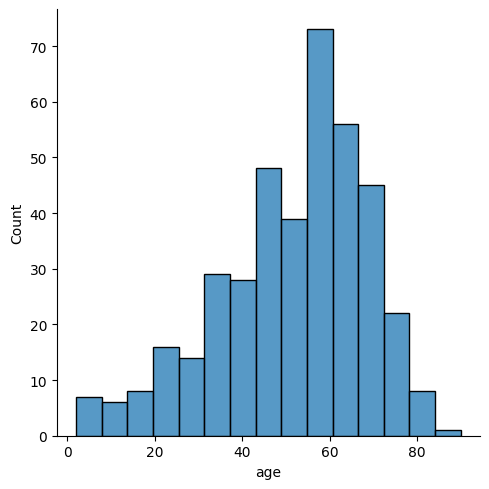

In [15]:
sns.displot(df.age)

Bivariate Analysis

Age vs Blood Pressure

Text(0.5, 1.0, 'Age vs Blood Pressure')

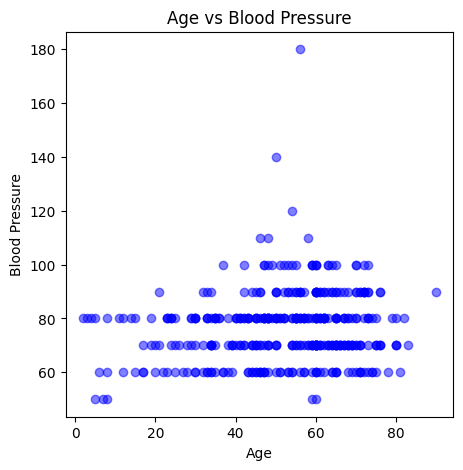

In [16]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['age'], df['bp'], color='blue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.title('Age vs Blood Pressure')

Multivariate Analysis

Age vs all continuous column

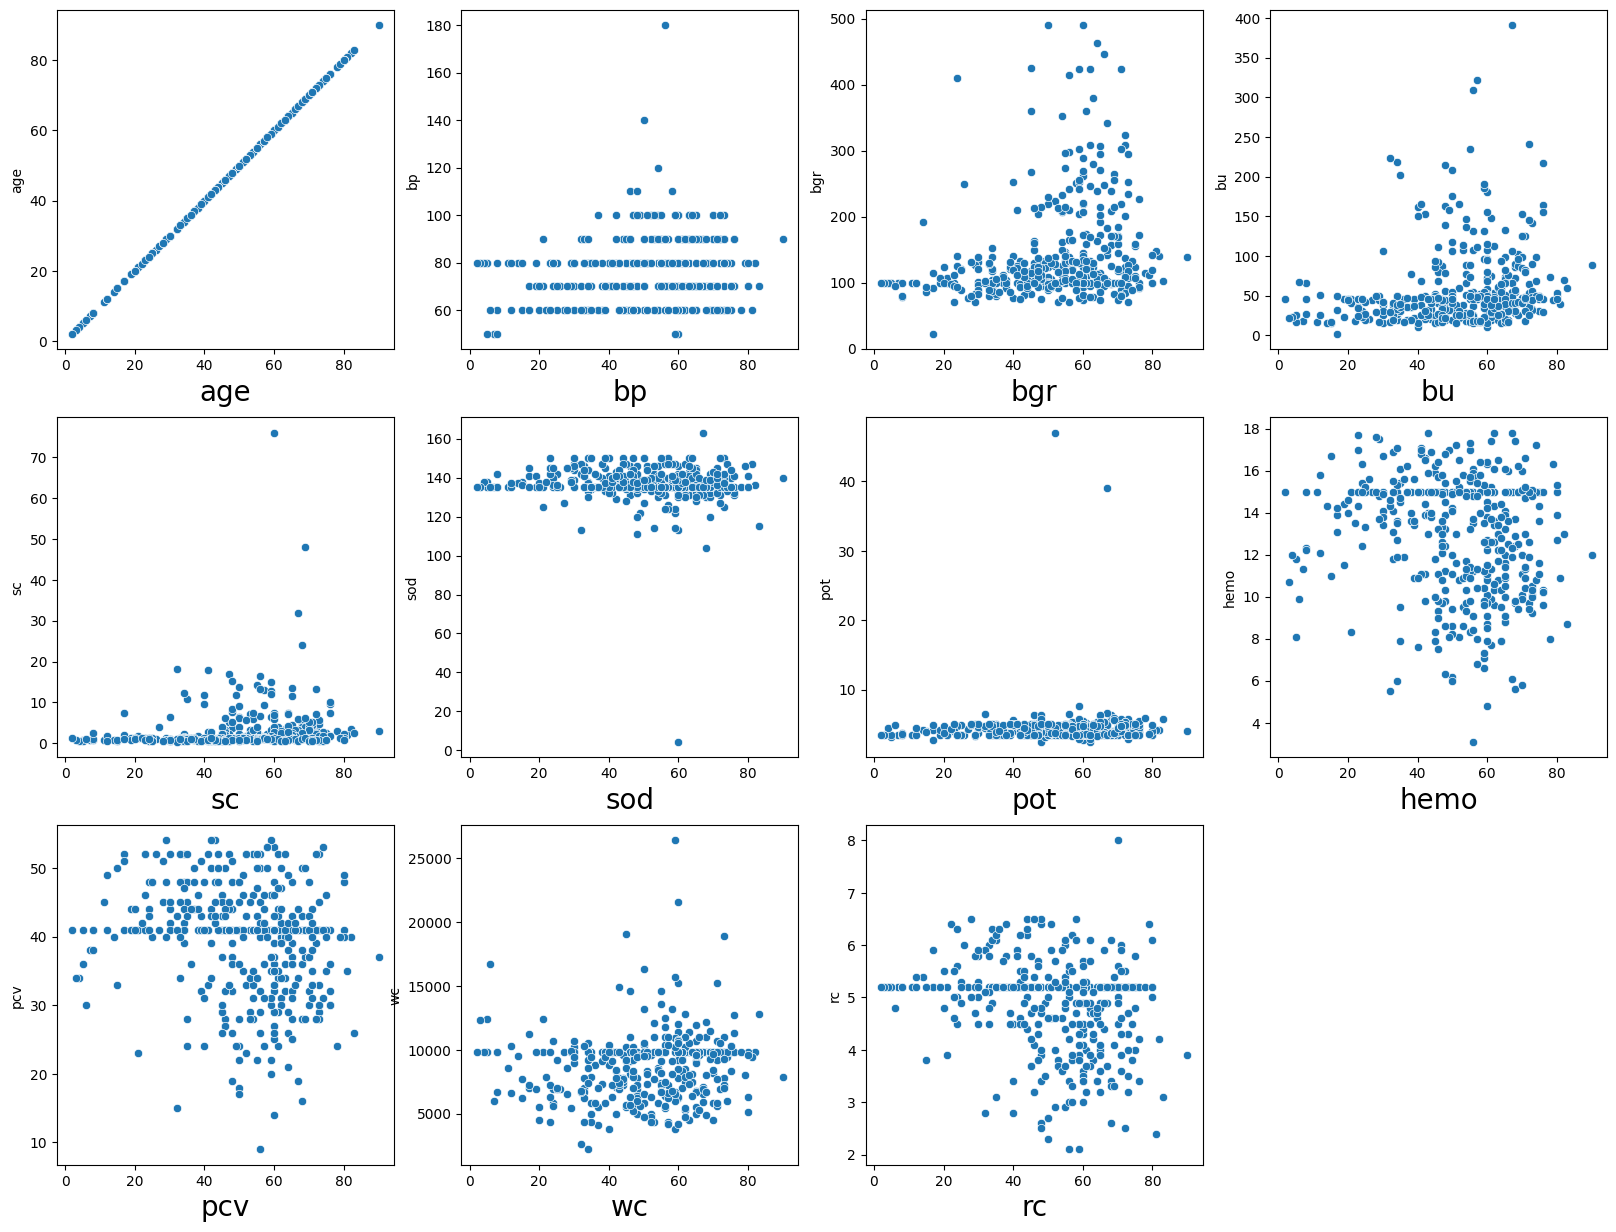

In [19]:
plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1

for column in numeric_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.scatterplot(x=df['age'], y=df[column])
        plt.xlabel(column, fontsize=20)

    plotnumber += 1

plt.show()

Heatmap

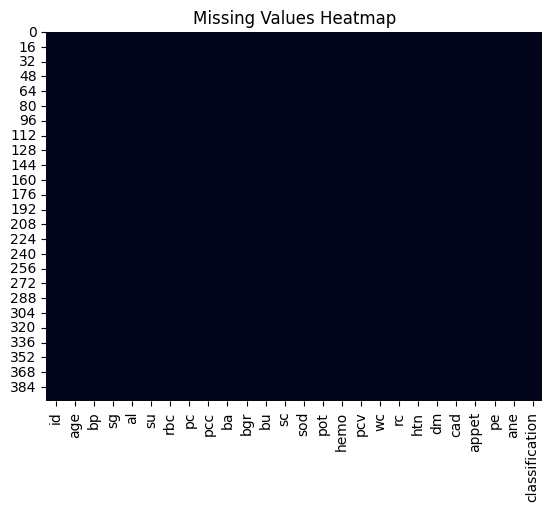

In [10]:
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

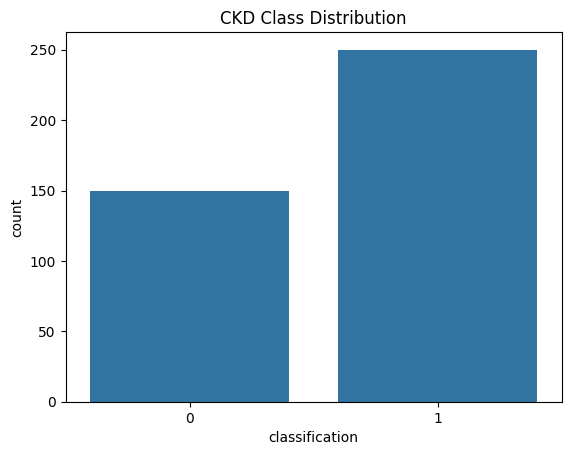

In [20]:
sns.countplot(x='classification', data=df)
plt.title("CKD Class Distribution")
plt.show()

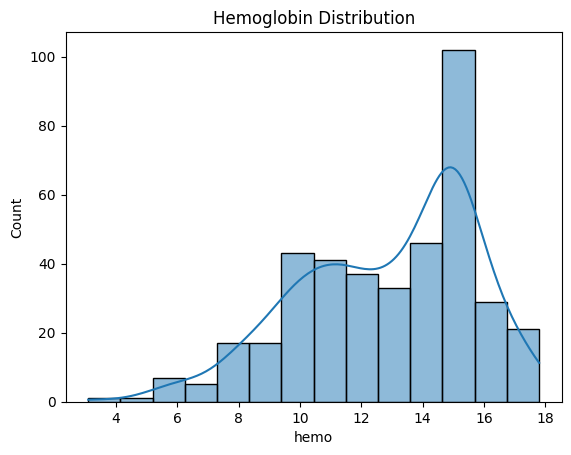

In [21]:
sns.histplot(df['hemo'], kde=True)
plt.title("Hemoglobin Distribution")
plt.show()

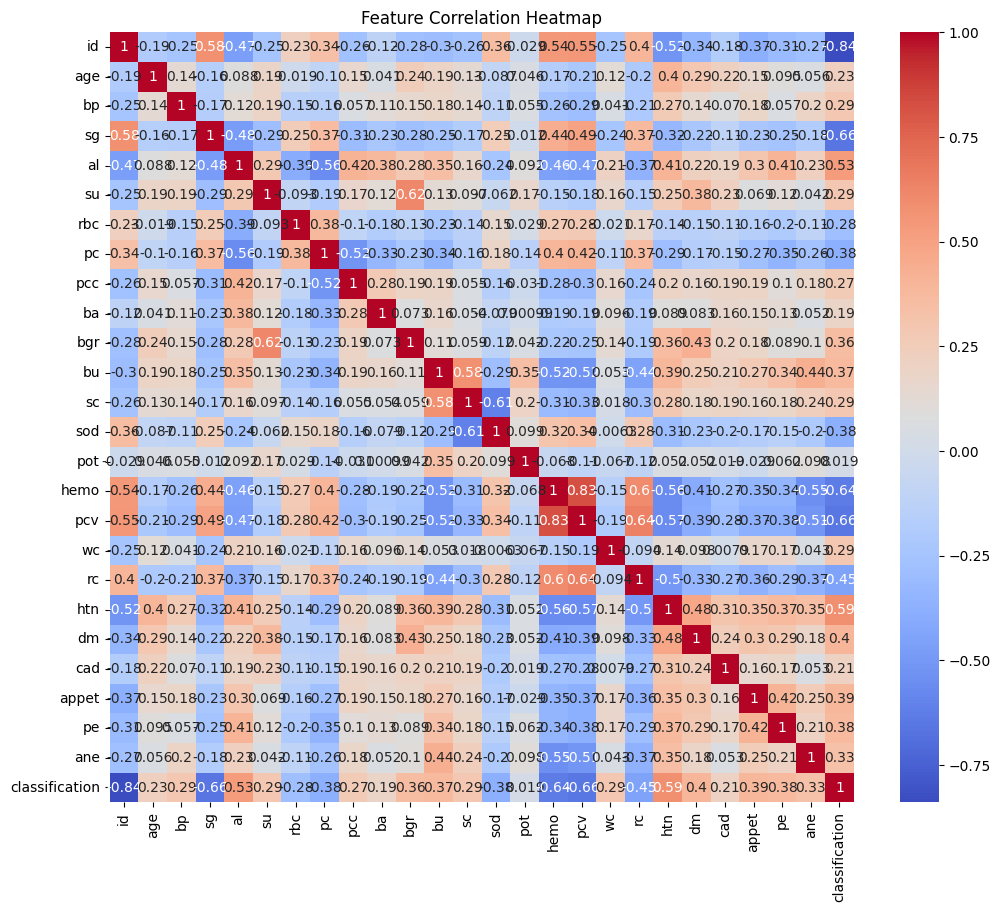

In [22]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()